## Постановка задачи:

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Установливаем библиотеку Pandas:

In [ ]:
! pip install pandas

Импортируем необходимые модули:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [3]:
data = pd.read_csv('./hotel_booking.csv', sep = ',', header=0, engine = 'python')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


Выводим первые 10 строк dataset-а:

In [4]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


Выводим последние 10 строк dataset-а:

In [5]:
data.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,Transient,140.75,0,1,Check-Out,2017-09-04,Wanda Jones,Wanda_J@yandex.com,379-374-7947,************8581
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,Transient,99.00,0,0,Check-Out,2017-09-05,Betty Taylor,BTaylor@yandex.com,114-632-1395,************1795
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,Transient,209.00,0,0,Check-Out,2017-09-05,Cesar Moreno,Cesar_M50@comcast.net,666-379-7260,************7835
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,Transient,87.60,0,0,Check-Out,2017-09-06,Jose Andersen,Andersen_Jose@protonmail.com,656-714-5930,************7923
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,Transient,96.14,0,2,Check-Out,2017-09-06,James Mccarty,James_M@att.com,689-204-7523,************7994
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


About dataset:

Context

This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

Content

Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.
Four Columns, 'name', 'email', 'phone number' and 'credit_card' have been artificially created and added to the dataset.

Acknowledgements

The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

- `hotel` - The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel.
- `is_canceled` - Value indicating if the booking was canceled (1) or not (0).
- `lead_time` - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date. 
- `arrival_date_year` - Year of arrival date.
- `arrival_date_month` - Month of arrival date with 12 categories: “January” to “December”.
- `arrival_date_week_number` - Week number of the arrival date.
- `arrival_date_day_of_month` - Day of the month of the arrival date.
- `stays_in_weekend_nights` - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- `stays_in_week_nights` - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting.
- `adults` - Number of adults.
- `children` - Number of children.
- `babies` - Number of babies.
- `meal` - BB – Bed & Breakfast.
- `country` - Country of origin.
- `market_segment` - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
- `distribution_channel` - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
- `is_repeated_guest` - Value indicating if the booking name was from a repeated guest (1) or not (0).
- `previous_cancellations` - Number of previous bookings that were cancelled by the customer prior to the current booking.
- `previous_bookings_not_canceled` - Number of previous bookings not cancelled by the customer prior to the current booking.
- `reserved_room_type` - Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- `assigned_room_type` - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- `booking_changes` - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
- `deposit_type` - No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- `agent` - ID of the travel agency that made the booking.
- `company` - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
- `days_in_waiting_list` - Number of days the booking was in the waiting list before it was confirmed to the customer.
- `customer_type` - Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.
- `adr` - Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights).
- `required_car_parking_spaces` - Number of car parking spaces required by the customer.
- `total_of_special_requests` - Number of special requests made by the customer (e.g. twin bed or high floor).
- `reservation_status` - Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.
- `reservation_status_date` - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.
- `name` - Name of the Guest (Not Real).
- `email` - Email (Not Real).
- `phone-number` - Phone number (not real).
- `credit_card` - Credit Card Number (not Real).















Ознакомимся с некоторыми свойствами Pandas.DataFrame на примере нашего dataset-а:

In [6]:
print(data.shape, end="\n\n")
print(data.columns, end="\n\n")
print(data.index, end="\n\n")
print(data.at[2, 'email'], end="\n\n")
print(data["email"][2], end="\n\n")
print(data["email"].dtype, end="\n\n")
print(type(data["email"]), end="\n\n")
print(type(data["email"][2]), end="\n\n")

(119390, 36)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

RangeIndex(start=0, stop=119390, step=1)

Rebecca_Parker@comcast.net

Rebecca_Parker@comcast.net

object

<class 'pandas.core.series.Series'>

<class 'str'>



Выведем описательную статистику по нашему dataset-у:

In [7]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
data.describe(include = ['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [9]:
data.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390,119390,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,3,926,81503,115889,119390,9000
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,Transient,NaN,NaN,NaN,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,89613,NaN,NaN,NaN,75166,1461,48,6,1,28
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,101.831122,0.062518,0.571363,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,50.535790,0.245291,0.792798,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,-6.380000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,69.290000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,94.575000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,126.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


Выведем матрицу графиков рессеивания (запускать на свой стах и риск):

In [10]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

Выведем матрицу корреляции наших численных признаков:

In [11]:
data.corr(numeric_only=True)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


По данной матрице можно сделать вывод, что в общей массе корреляция между признаками достаточно мала (исключение составляют, например, признаки `stays_in_week_nights` и `stays_in_weekend_nights`).

Визуализируем некоторые графики корреляции:

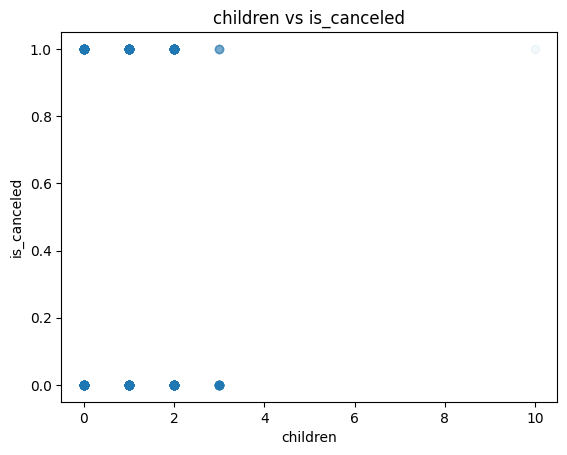

In [12]:
plt.plot(data['children'], data['is_canceled'], 'o', alpha = 0.05)
plt.xlabel('children')
plt.ylabel('is_canceled')
plt.title('children vs is_canceled')
pass

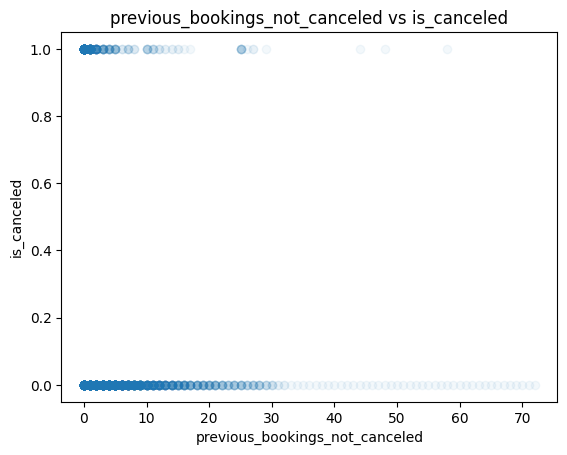

In [13]:
plt.plot(data['previous_bookings_not_canceled'], data['is_canceled'], 'o', alpha = 0.05)
plt.xlabel('previous_bookings_not_canceled')
plt.ylabel('is_canceled')
plt.title('previous_bookings_not_canceled vs is_canceled')
pass

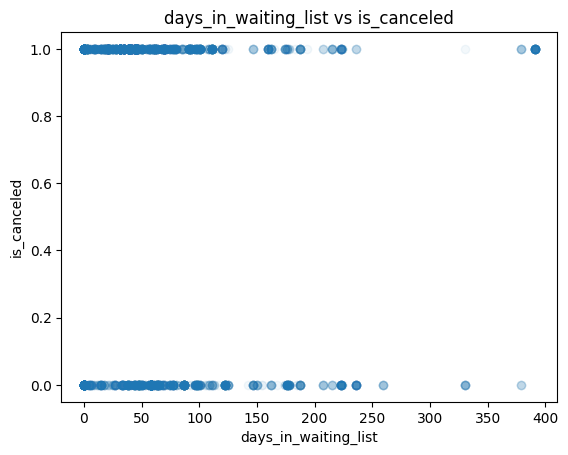

In [14]:
plt.plot(data['days_in_waiting_list'], data['is_canceled'], 'o', alpha = 0.05)
plt.xlabel('days_in_waiting_list')
plt.ylabel('is_canceled')
plt.title('days_in_waiting_list vs is_canceled')
pass

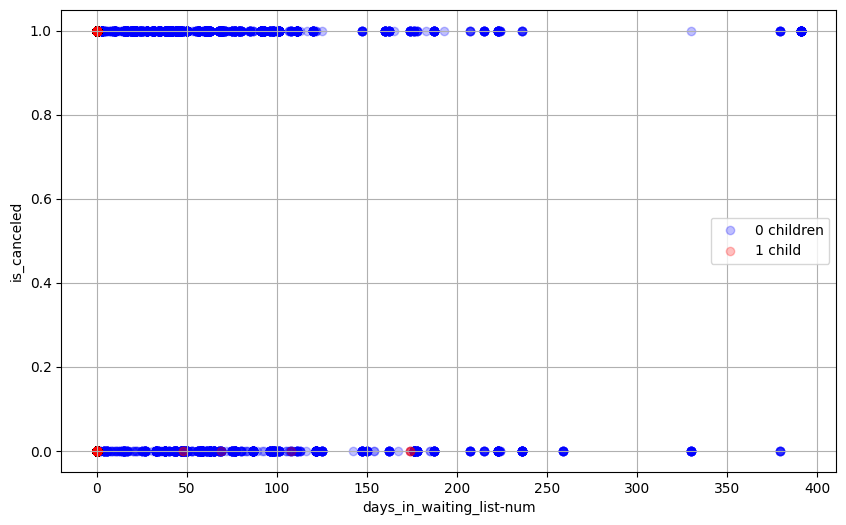

In [15]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['children'] == 0]['days_in_waiting_list'],
            data[data['children'] == 0]['is_canceled'],
            alpha = 0.25,
            label = '0 children',
            color = 'b')

plt.scatter(data[data['children'] == 1]['days_in_waiting_list'],
            data[data['children'] == 1]['is_canceled'],
            alpha = 0.25,
            label = '1 child',
            color = 'r')

plt.xlabel('days_in_waiting_list-num')
plt.ylabel('is_canceled')
plt.legend()
plt.grid()

По данным графикам можно, например, установить, что число отдыхающих без детей много больше, чем число отдыхающих с 1-м ребенком.
Или, например, что чем больше у клиентов бронирований без отмены, тем с большей вероятностью, они действительно заселятся в отель.

Выведем уникальные значения для некоторых нечисловых признаков:

In [16]:
data['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [17]:
data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [18]:
data['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

## Готовим данные

Рассортируем категориальные и численные признаки:

In [19]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


Выведем все уникальные значения для каждого категориального признака:

In [20]:
for c in categorical_columns:
    print(f"{c}: {data[c].unique()}")

hotel: ['Resort Hotel' 'City Hotel']
arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH'

Отсутствующие значения `agent` и `company` заменим на 0:

In [21]:
data["agent"] = data["agent"].fillna(0, axis=0)
data["company"] = data["company"].fillna(0, axis=0)

Отсутствующие значения поля `country` заменим на значение моды данного признака:

In [22]:
data["country"] = data["country"].fillna(data["country"].mode, axis=0)

Убедимся в корректности проделанных действий:

In [23]:
data[numerical_columns].count(axis = 0)

is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
booking_changes                   119390
agent                             119390
company                           119390
days_in_waiting_list              119390
adr                               119390
required_car_parking_spaces       119390
total_of_special_requests         119390
dtype: int64

In [24]:
data[categorical_columns].count(axis = 0)

hotel                      119390
arrival_date_month         119390
meal                       119390
country                    119390
market_segment             119390
distribution_channel       119390
reserved_room_type         119390
assigned_room_type         119390
deposit_type               119390
customer_type              119390
reservation_status         119390
reservation_status_date    119390
name                       119390
email                      119390
phone-number               119390
credit_card                119390
dtype: int64

Как видим, пропущенных значений больше не осталось

In [25]:
data["agent"].describe()

count    119390.000000
mean         74.828319
std         107.141953
min           0.000000
25%           7.000000
50%           9.000000
75%         152.000000
max         535.000000
Name: agent, dtype: float64

In [26]:
data["company"].describe()

count    119390.000000
mean         10.775157
std          53.943884
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         543.000000
Name: company, dtype: float64

In [27]:
data["country"].describe()

count     119390
unique       178
top          PRT
freq       48590
Name: country, dtype: object

Разделим категориальные признаки на бинарные и небинарные:

In [28]:
binary_columns    = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['hotel'] ['arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']


Для бинарного признака заменим значения на 0 и 1:

In [29]:
data.loc[data['hotel'] == 'Resort Hotel', 'hotel'] = 0
data.loc[data['hotel'] == 'City Hotel', 'hotel'] = 1

Проверим результат:

In [30]:
data['hotel'].describe()

count     119390
unique         2
top            1
freq       79330
Name: hotel, dtype: int64

Как можно заметить, у нас есть 4 категориальных признака, которые обладают большим количеством уникальных значей (`name`, `email`, `phone-number`, `credit_card`). Их векторизация - занятие сомнительное, поэтому просто уберем их из нашего dataset-а:

In [31]:
data = data.drop(labels=["name", "email", "phone-number", "credit_card"], axis=1)
data



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,1,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,1,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,1,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [32]:
nonbinary_columns.remove("name")
nonbinary_columns.remove("email")
nonbinary_columns.remove("phone-number")
nonbinary_columns.remove("credit_card")
nonbinary_columns


['arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

К небинарным признакам применим метод векторизации:

In [33]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary

,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
119386,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
119387,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
119388,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Нормализуем количественные признаки (это полезно, т.к. мы будем использовать, в том числе, метод ближайших соседей):

In [34]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193860e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,-5.332493e-17,3.618477e-17,-8.429909e-14,-1.847328e-16,6.094277e-17,-1.225997e-17,4.427873e-17,-5.522939e-17,4.285182e-17,-1.356929e-17,4.570708e-17,3.332808e-18,2.571023e-17,-2.380577e-17,1.142677e-17,1.428346e-17,4.094593e-17,2.818603e-16,-3.142362e-17,-4.951600e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.670373e-01,-9.733146e-01,-1.634761e+00,-1.923183e+00,-1.685290e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606622e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-6.984035e-01,-1.997475e-01,-1.319230e-01,-2.141277e+00,-2.548718e-01,-7.206911e-01
25%,-7.670373e-01,-8.048748e-01,-2.212855e-01,-8.206585e-01,-8.880985e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-6.330697e-01,-1.997475e-01,-1.319230e-01,-6.439223e-01,-2.548718e-01,-7.206911e-01
50%,-7.670373e-01,-3.276287e-01,-2.212855e-01,6.136116e-02,2.297721e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-6.144028e-01,-1.997475e-01,-1.319230e-01,-1.435838e-01,-2.548718e-01,-7.206911e-01
75%,1.303707e+00,5.239281e-01,1.192190e+00,7.963776e-01,8.201684e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,7.202751e-01,-1.997475e-01,-1.319230e-01,4.782527e-01,-2.548718e-01,5.406636e-01
max,1.303707e+00,5.923360e+00,1.192190e+00,1.898902e+00,1.731244e+00,1.809749e+01,2.489129e+01,9.174379e+01,2.482957e+01,1.025497e+02,5.507786e+00,3.069024e+01,4.799061e+01,3.185451e+01,4.294972e+00,9.866269e+00,2.209065e+01,1.048399e+02,3.235943e+01,5.586082e+00


Cоеднияем все данные:

In [57]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
data.describe(include="all")

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14,hotel
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193860e+05,1.193900e+05,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79330.0
mean,-5.332493e-17,3.618477e-17,-8.429909e-14,-1.847328e-16,6.094277e-17,-1.225997e-17,4.427873e-17,-5.522939e-17,4.285182e-17,-1.356929e-17,...,0.000310,0.000176,0.000134,0.000159,0.000034,0.000050,0.000034,0.000008,0.000017,NaN
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.017602,0.013261,0.011576,0.012614,0.005788,0.007089,0.005788,0.002894,0.004093,NaN
min,-7.670373e-01,-9.733146e-01,-1.634761e+00,-1.923183e+00,-1.685290e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606622e-01,-8.157892e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,-7.670373e-01,-8.048748e-01,-2.212855e-01,-8.206585e-01,-8.880985e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,-7.670373e-01,-3.276287e-01,-2.212855e-01,6.136116e-02,2.297721e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1.303707e+00,5.239281e-01,1.192190e+00,7.963776e-01,8.201684e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606622e-01,-8.157892e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


Разбиваем наши данные на y и x:

In [36]:
X = data.drop('hotel', axis = 1) # выбрасываем столбец 'class'
y = data['hotel']
feature_names = X.columns
print(feature_names)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies',
       ...
       'reservation_status_date_2017-09-03',
       'reservation_status_date_2017-09-04',
       'reservation_status_date_2017-09-05',
       'reservation_status_date_2017-09-06',
       'reservation_status_date_2017-09-07',
       'reservation_status_date_2017-09-08',
       'reservation_status_date_2017-09-09',
       'reservation_status_date_2017-09-10',
       'reservation_status_date_2017-09-12',
       'reservation_status_date_2017-09-14'],
      dtype='object', length=1186)


In [37]:
X=X.to_numpy()
y=y.to_numpy()

In [58]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[-0.76703728  2.2270418  -1.6347611  ...  0.          0.
   0.        ]
 [-0.76703728  5.9233599  -1.6347611  ...  0.          0.
   0.        ]
 [-0.76703728 -0.90781026 -1.6347611  ...  0.          0.
   0.        ]
 ...
 [-0.76703728 -0.65515055  1.19219015 ...  0.          0.
   0.        ]
 [-0.76703728  0.04668201  1.19219015 ...  0.          0.
   0.        ]
 [-0.76703728  0.94502767  1.19219015 ...  0.          0.
   0.        ]]

[0 0 0 ... 1 1 1]

(119390, 1186)

(119390,)



Разделим наш dataset на обучающую и тестовую выборку:

In [ ]:
import sys
!{sys.executable} -m pip install scikit-learn

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

83573 35817 (83573,) (35817,)


Оказалось, что наши данные содержат незначительное количество полей типа nan. Заменим их на данные из других строк таблицы (таких значения всего 4, на общую картину это никак не повлияет):

In [41]:
print(np.argwhere(np.isnan(X_train)))
for i, j in np.argwhere(np.isnan(X_train)):
    X_train[i][j] = X_train[0][j]

print(np.argwhere(np.isnan(X_test)))
for i, j in np.argwhere(np.isnan(X_test)):
    X_test[i][j] = X_test[0][j]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[[33938     8]]
[[13445     8]
 [14265     8]
 [33182     8]]
(83573, 1186)
(83573,)
(35817, 1186)
(35817,)


Интерпретируем все значения `y` как целые числа:

In [42]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [49]:
print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.030572074713125053
err_test=0.03757992014964961


In [59]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[26500  1508]
 [ 1047 54518]]

[[11240   812]
 [  534 23231]]



Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку (работает очень медленно):

In [ ]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(X_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

Лучший результат достигается при n=3:

In [51]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.01792444928385962
err_test=0.03478794985621353


## Другие алгоритмы обучения:

### SVC (работает очень, очень медленно):

In [52]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.07982243068933746
err_test=0.0785939637602256


### Random Forest:

In [53]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.0
err_test=0.013094340676215205


### Extremely Randomized Trees:

In [54]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.0
err_test=0.01831532512494067


### AdaBoost (работает очень медленно):

In [55]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.0197791152644993
err_test=0.02331295195019125


### GBT (работает очень, очень медленно):

In [56]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.00929726107714214
err_test=0.013094340676215205


Наилуший результат показывает Random Forest и GBT. Ошибка на тестовой выборке состовляет ~ 0.013. При этом, на обучение алгоритмом Random Forest затрачивается намного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.
